<h1  style="text-align: center"color="Red"><font color="Green">Fraud Detection</font></h1>

[`Reference Paper`](#https://ieeexplore.ieee.org/document/8123782?reload=true)
[`Data Set`](#https://www.kaggle.com/mlg-ulb/creditcardfraud)

---

### Data and library import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('E:\Projects\ML_Projects\myenv1\datasets\creditcard\creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Sampling the data to reduce computation time. 
df= df.sample(frac = 0.2, random_state = 1)

In [5]:
print('The data is of dimensions of ',df.shape)
print('\n')
df.info()

The data is of dimensions of  (56961, 31)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 56961 entries, 169876 to 77261
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56961 non-null  float64
 1   V1      56961 non-null  float64
 2   V2      56961 non-null  float64
 3   V3      56961 non-null  float64
 4   V4      56961 non-null  float64
 5   V5      56961 non-null  float64
 6   V6      56961 non-null  float64
 7   V7      56961 non-null  float64
 8   V8      56961 non-null  float64
 9   V9      56961 non-null  float64
 10  V10     56961 non-null  float64
 11  V11     56961 non-null  float64
 12  V12     56961 non-null  float64
 13  V13     56961 non-null  float64
 14  V14     56961 non-null  float64
 15  V15     56961 non-null  float64
 16  V16     56961 non-null  float64
 17  V17     56961 non-null  float64
 18  V18     56961 non-null  float64
 19  V19     56961 non-null  float64
 20  V20     56961 non-null 

In [6]:
# Checking for presence of null values, if any such value is present it must be dropped
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# As the fraudulent case are less then genuine transaction, we will try to get number of such case in the data set 
# The class column deals with such values. 0 represent nomal and 1 represent the fraudulant activity
fraud=df[df['Class']==1]
valid=df[df['Class']==0]

print('The total fraud case : {}'.format(len(fraud)))
print('The total valid  transactions : {}'.format(len(valid)))
print('The percentage of fraudulant transactions is {} %'.format(len(fraud)/len(df)*100))

The total fraud case : 87
The total valid  transactions : 56874
The percentage of fraudulant transactions is 0.15273608258281984 %


<AxesSubplot:>

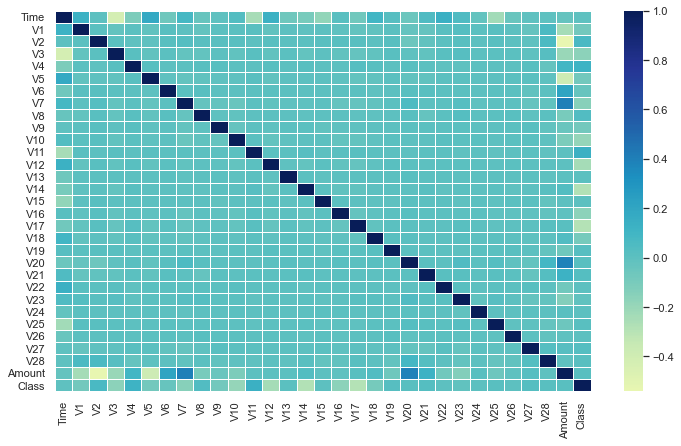

In [8]:
# Correlation marix shows almost zero correlation
plt.figure(figsize=(12,7))
corrmat = df.corr()
sns.heatmap(corrmat,cmap="YlGnBu",center=0.1,linewidths=.5)

<p>From the above analysis it is clear that the dataset is not distributed normally and have high order of skewness. We will try to see the effect of randomforestclassifier on this dataset directly. The data can be distributed using stratified sampling or similar statistical method to give better results. (See attached paper)</p>

---

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Choosing our x and y datafame
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)

(56961, 30)
(56961,)


In [11]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
# Determine the fitness of any model
def model(model):
    print('Model is: {}'.format(model))
    model.fit(X_train,y_train)
    yPred = model.predict(X_test)
    score = model.score(X_test,y_test)
    print("Accuracy: {}".format(score))
    cv_score = cross_val_score(model,X_train,y_train,cv=5)
    print("Cross Val Score: {}".format(np.mean(cv_score)))
    f1 = f1_score(y_test, yPred)
    print("The F1-Score is {}".format(f1))

In [13]:
# Random forest seems to overfitting
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model(clf)

Model is: RandomForestClassifier()
Accuracy: 0.9998244536118669
Cross Val Score: 0.9992977499173389
The F1-Score is 0.9285714285714286


In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model(clf)

Model is: LogisticRegression()
Accuracy: 0.9988589484771351
Cross Val Score: 0.9987491265218278
The F1-Score is 0.606060606060606
